In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [9]:
associativity = []
for i in range(196):
    file_name = "result_p/results_clearPHR_{}.csv".format(i)
    data = pd.read_csv(file_name, delim_whitespace=True) 
    data = clean_df(data)

    #data = data.drop([0])

    data["BrIndir"] = pd.to_numeric(data["BrIndir"],errors='coerce')
    data["BrMispInd"] = pd.to_numeric(data["BrMispInd"],errors='coerce')

    num_rows = len(data)
    data["BranchNumber"] = data["BrIndir"] / 2000

    drop_indices = [i for j in range(num_rows // 41) for i in range(41*j, 41*j + 21)]
    data = data.drop(drop_indices)

    data["BrMispInd_Rate"] = data["BrMispInd"] / data["BrIndir"]


    min_val = int(data["BranchNumber"].min())
    max_val = int(data["BranchNumber"].max())
    ijmp_number = []
    miss_rate = []
    miss_num = []

    for i in range(min_val, max_val + 1):
        miss_rate_average = data[data["BranchNumber"] == i]["BrMispInd_Rate"].mean()
        miss_num_average = data[data["BranchNumber"] == i]["BrMispInd"].mean()
        ijmp_number.append(i)
        miss_rate.append(miss_rate_average)
        miss_num.append(miss_num_average)

    temp = {'ijmp_number': ijmp_number, 'miss_rate': miss_rate, 'miss_num': miss_num}
    miss_rate_table = pd.DataFrame(temp)
    miss_rate_table['rate_increase'] = miss_rate_table['miss_rate'].pct_change()
    miss_rate_table['num_increase'] = miss_rate_table['miss_num'].pct_change()
    # (miss_rate_table['miss_rate'] > 0.05) & (miss_rate_table['rate_increase'] > 1)
    filtered_rows = miss_rate_table[(miss_rate_table['miss_num'] > 500)]
    # max_rate_inc_index = filtered_rows['rate_increase'].idxmax()
    # ijmp_number_max_rate = filtered_rows.loc[max_rate_inc_index, 'ijmp_number']
    ijmp_numbers = filtered_rows['ijmp_number'].tolist()


    if len(ijmp_numbers) == 0:
        associativity.append(0)
    else:
        associativity.append(ijmp_numbers[0]-1)


In [10]:
PHR_left_shift = list(range(0, 196))
temp = {'PHR_left_shift': PHR_left_shift, 'Associativity': associativity}
result_table = pd.DataFrame(temp)


In [11]:
result_table

,PHR_left_shift,Associativity
0,0,3
1,1,5
2,2,5
3,3,4
4,4,3
...,...,...
191,191,2
192,192,2
193,193,2
194,194,0


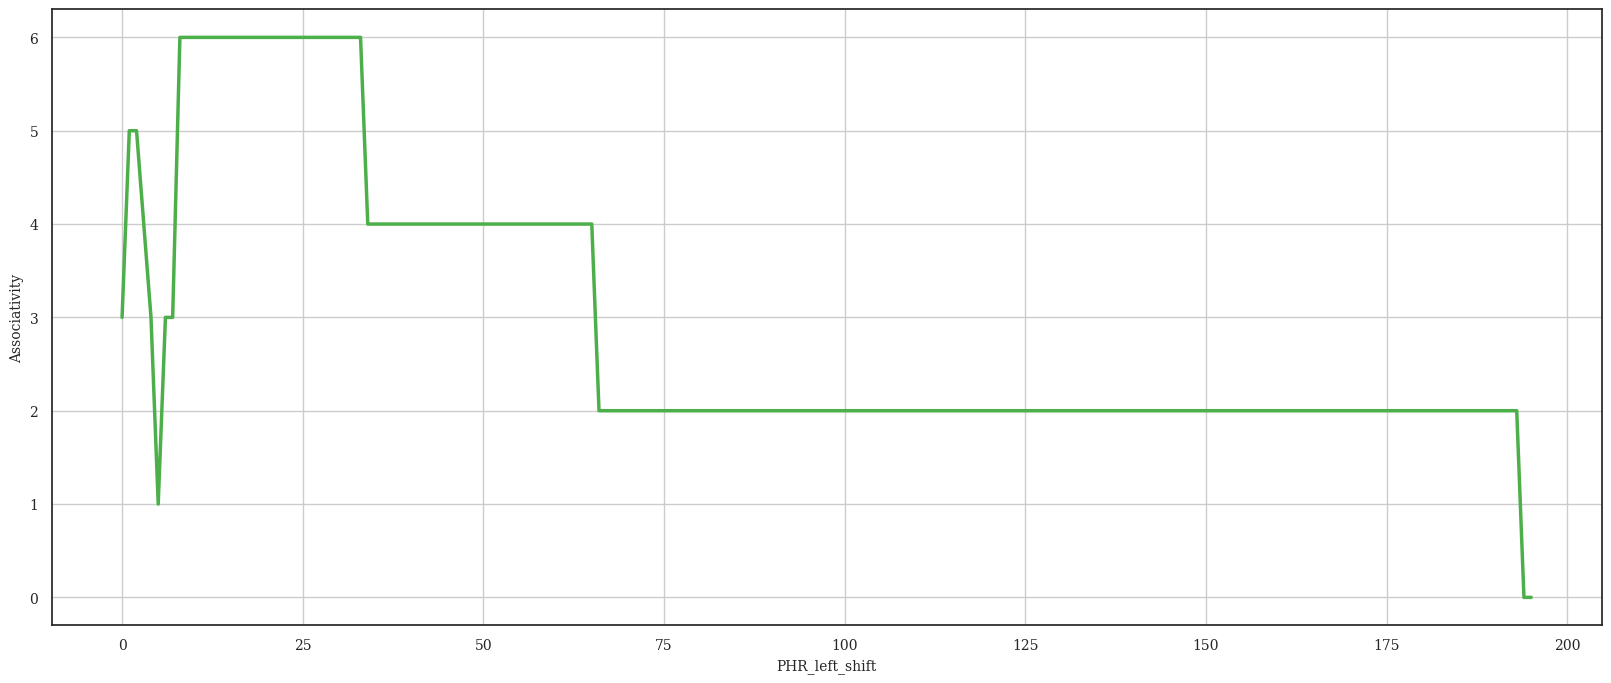

In [12]:
def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(20,8),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=result_table, x="PHR_left_shift", y="Associativity", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 0, errorbar=None)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,9))
#p.set(ylim=(-0.1,1.1))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')